### Decision trees
problem --> Titanic Survivor prediction kaggle challenge
### learning goals
- How to pre -process data?

    - Dropping not useful features
    - Filling the missing values (data imputation)

- Creating a binary decision tree from scratch


In [147]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

In [148]:
data = pd.read_csv('Titanic.csv')

In [149]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
## Feature selection
columns_to_drop = ['PassengerId','Embarked','Ticket','Cabin','Name']

In [152]:
data_clean = data.drop(columns_to_drop,axis=1)

In [153]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [154]:
data_clean.loc[data_clean['Sex'] == 'female','Sex'] = 0
data_clean.loc[data_clean['Sex'] == 'male','Sex'] = 1
# same thing would have been done by from sklearn.preprocessing import labelEncoder

In [155]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [156]:
# To fill the NAN value in a dataframe -->
data_clean = data_clean.fillna?

In [157]:
data_clean = data_clean.fillna(data_clean['Age'].mean())

In [158]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [159]:
# To see the data of 2nd row
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [160]:
X, Y = data_clean.drop(columns=["Survived"],axis=1), pd.DataFrame(data_clean['Survived'])

In [161]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [162]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [163]:
columns = X.columns

In [164]:
X.shape,Y.shape

((891, 6), (891, 1))

In [165]:
# define Entropy and information gain


In [166]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    ent = 0.0
    for ix in counts[1]:
        p = ix/N
        ent += (-1*p*np.log2(p))

    return ent

In [167]:
# check entropy func -->
col = np.array([0,0,1,0,0,0,0,0,1,0,1,0,1,1])
entropy(col)

0.9402859586706311

In [168]:
def divide_data(x_data,fkey,fval):
    # works with pandas dataframe
    '''

    :param x_data: pandas dataframe
    :param fkey: column name
    :param fval: Threshold value
    :return: x_right and x_left
    '''
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)

    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])

        else:
            x_left =x_left.append(x_data.loc[ix])


    return x_left, x_right


def information_gain(x_data,fkey,fval):
        left, right = divide_data(x_data,fkey,fval)

        # % of total samples are on left and right
        l = float(left.shape[0])/x_data.shape[0]
        r = float(right.shape[0])/x_data.shape[0]

        # all examples at one side:
        if left.shape[0] == 0 or right.shape[0] == 0:
            return -1000000

        i_gain = entropy(x_data.Survived) - l*entropy(left.Survived) - r*entropy(right.Survived)

        return i_gain


In [169]:
# test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606143
Age
0.0008836151229467681
SibSp
0.009584541813400127
Parch
0.015380754493137666
Fare
0.04214069283899541


In [170]:
# if the tress's depth is greater than required, then the tree will overfit badly
class DecisionTree:

    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None

    def train(self,x_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []

        for ix in features:
            i_gain = information_gain(x_train,ix,x_train[ix].mean())
            info_gains.append(i_gain)

        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()

        print("Making tree -->",self.fkey)
        # split data
        data_left, data_right = divide_data(x_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)

        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if x_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = 'Dead'
            return

        if self.depth >= self.max_depth:
            if x_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = 'Dead'
            return

        # Recursion case

        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)

        self.right = DecisionTree(depth=self.depth+1)
        self.right.train(data_right)

        if x_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = 'Dead'
        return

    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [171]:
d = DecisionTree()
# d.train(data_clean)

### Train validation test set split

In [172]:

split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:].reset_index(drop=True)

In [173]:
test_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,21.000000,0,0,7.8542
1,0,3,1,21.000000,0,0,16.1000
2,0,1,1,61.000000,0,0,32.3208
3,0,2,1,57.000000,0,0,12.3500
4,1,1,0,21.000000,0,0,77.9583
...,...,...,...,...,...,...,...
263,0,2,1,27.000000,0,0,13.0000
264,1,1,0,19.000000,0,0,30.0000
265,0,3,0,29.699118,1,2,23.4500
266,1,1,1,26.000000,0,0,30.0000


In [174]:
d.train(train_data)

Making tree --> Sex
Making tree --> Pclass
Making tree --> Age
Making tree --> SibSp
Making tree --> Pclass
Making tree --> Age
Making tree --> Age
Making tree --> SibSp
Making tree --> Parch
Making tree --> Pclass
Making tree --> SibSp
Making tree --> Fare
Making tree --> Parch
Making tree --> Age
Making tree --> Pclass
Making tree --> Age
Making tree --> Age
Making tree --> Parch
Making tree --> SibSp
Making tree --> Fare
Making tree --> Age
Making tree --> Age
Making tree --> Fare
Making tree --> Age
Making tree --> Age
Making tree --> Fare
Making tree --> Age
Making tree --> Parch
Making tree --> Fare
Making tree --> Fare
Making tree --> Fare
Making tree --> Age
Making tree --> Fare
Making tree --> Parch
Making tree --> Fare
Making tree --> Age
Making tree --> Age
Making tree --> Fare
Making tree --> Fare
Making tree --> SibSp
Making tree --> Fare
Making tree --> Age
Making tree --> Fare
Making tree --> Pclass
Making tree --> SibSp
Making tree --> Age
Making tree --> Age
Making tre

In [175]:
print(d.fkey)
print(d.right.fkey)

Sex
Fare


In [176]:
ypred = []
for ix in range(test_data.shape[0]):
    ypred.append(d.predict(test_data.loc[ix]))

In [177]:
ypred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
ls = LabelEncoder()

In [180]:
y_pred = ls.fit_transform(ypred)

In [181]:
y_pred = np.array(y_pred).reshape((-1,))

In [182]:
y_actual = test_data['Survived'].values

In [183]:
acc = np.sum(y_pred == y_actual)/y_actual.shape[0]

In [184]:
y_pred.shape

(268,)

In [185]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [186]:
acc

0.8171641791044776

### Decision tree using Sklearn

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [189]:
sk_tree.fit(train_data[columns],train_data['Survived'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [190]:
sk_tree.predict(test_data[columns])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [191]:
sk_tree.score(test_data[columns],test_data['Survived'])

0.8283582089552238

### Visualize a decision tree

In [192]:
import pydotplus

In [193]:
import io
from IPython.display import Image
from sklearn.tree import export_graphviz

In [194]:
dot_data = io.StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

In [195]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [196]:
Image(graph.create_jpg())

InvocationException: GraphViz's executables not found

## Random Forests

**Over-fitting !!**

In [197]:
sk_tree = DecisionTreeClassifier(criterion='entropy')

In [198]:
sk_tree.fit(train_data[columns],train_data['Survived'])
sk_tree.score(train_data[columns],train_data['Survived'])

0.9823434991974318

In [199]:
sk_tree.score(test_data[columns],test_data.Survived)

0.7723880597014925

In [200]:
from sklearn.model_selection import cross_val_score

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
rf = RandomForestClassifier(n_estimators=23,criterion='entropy',max_depth=5)

In [240]:
x_train = train_data[columns]
y_train = train_data.Survived
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=23)

In [241]:
rf.score(x_train,y_train)

0.8491171749598716

In [242]:
x_test = test_data[columns]
y_test = test_data.Survived
rf.score(x_test,y_test)

0.8283582089552238

In [243]:
acc = cross_val_score(rf,x_train,y_train,cv=5).mean()

In [244]:
acc

0.8266064516129031

In [235]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5),x_train,y_train,cv=5).mean()
    acc_list.append(acc)

In [236]:
import matplotlib.pyplot as plt

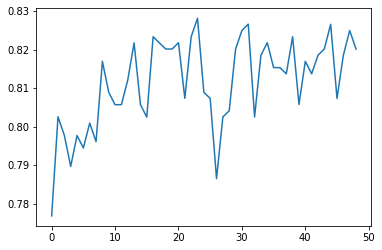

In [237]:
plt.plot(acc_list)

In [238]:
np.argmax(acc_list)

23